# Using Qiskit and IBM quantum computers to explore quantum mechanics

## NCS-AAPT Spring Meeting 2022
## High Point University
## April 2, 2022

-----

# Outline

## - I. [Introduction](#part1)
## - II. [Stern-Gerlach Experiment](#part2)
## - III. [Time evolution of single spins](#part3)
## - IV. [Engtanglement and correlations](#part4)

<a id='part1'></a>

-----
# Part I: Introduction
----

In this tutorial, we are going to explore the basics of using IBM's quantum devices. There are essentially <i>three</i> ways you can use this hardware:

1. Use the IBM Quantum Composer to drag and drop gates in order to create quantum circuits
2. Use the IBM Quantum Lab (like Google colab) to run Jupyter notebooks on the cloud
3. Download and install Qiskit on your own machine and run Jupyter notebooks locally

In this workshop, you'll want to choose either option 2 or 3. Running things in the IBM Quantum Lab is fine for most applications. But the extra effort required to install Qiskit really pays off with additional flexibility. 

You can download Qiskit from the main Qiskit [website](https://qiskit.org/). This website also contains detailed installation information. Note that it is recommended to create a separate ```conda``` environment. You might also find that other packages need to be reinstalled in this environment. 

To (a) run circuits on the actual quantum hardware and (b) gain access to IBM Quantum Composer/Lab environments, you'll need to create a free IBM Quantum [account](https://www.ibm.com/quantum-computing/).

In what follows, I will assume you have an IBM Quantum account and are working on a local installation of Qiskit.

Aside from importing ```qiskit```, all we need to get started is the ``standard'' stuff. For those of you new to Python or Jupyter notebooks, the following cell is <i>executable</i>, and you can run the commands by holding ```SHIFT``` and pressing ```ENTER```.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from qiskit import *

A classical bit can take on the values of 0 or 1. A small piece of magnetic material can physically represent this bit. Specifically, taking the $z$ axis as our preferred direction, a magnetization pointing "up" can represent 0 while "down" can represent 1. External magnetic fields can be used to flip these domains invidually, allowing arbitrary binary information to be encoded in some large collection of bits.

In a <i>quantum</i> computer, these bits are replaced by <b>qubits</b>, or two-level quantum mechanical systems which can exist in an arbitrary superposition of two basis states (labeled $\left|0\right\rangle$ and $\left|1\right\rangle$).

$$\left|\psi\right\rangle = \alpha \left|0\right\rangle + \beta \left|1\right\rangle$$

A measurement of the state then results in the system "collapsing" to either $\left|0\right\rangle$ or $\left|1\right\rangle$. The quantum "weirdness" results from the fact that before such a measurement, the system really doesn't have a well-defined "value" (0 or 1). 

The states $\left|0\right\rangle$ and $\left|1\right\rangle$ can be mapped to the spin basis states $\left|+\right\rangle$ and $\left|-\right\rangle$ where

$$\hat{S}^{z} \left|\pm\right\rangle = \pm \frac{\hbar}{2}\left|\pm\right\rangle$$

<b>Important warning:</b> In the Qiskit documentation, the labels $\left|\pm\right\rangle$ actually refer to the linear combinations $\left|\pm\right\rangle \rightarrow \frac{1}{\sqrt{2}}\left(\left|0\right\rangle \pm \left|1\right\rangle\right)$ rather than the eigenstates of $\hat{S}^{z}$ as in many quantum mechanics textbooks (e.g., [McIntyre](https://sites.science.oregonstate.edu/physics/coursewikis/portfolioswiki/texts_quantumbook_start.html)). In an effort to make these materials congruent with the standard QM notation, I will follow McIntyre's conventions. Just be warned that you might see some seemingly-strange conventions if you go poking around the (excellent) Qiskit [textbook](https://qiskit.org/textbook/).

Let's consider an extremely circuit to see how some of this stuff works. The following commands create a single-qubit circuit (so it's like simulating a single spin):

In [2]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

circ = QuantumCircuit(qr,cr)

The ```QuantumRegister(n)``` creates a circuit with ```n``` qubits. From this point on, you can mentally replace "qubit" by "spin." Note that upon measuring a qubit (just like when measuring a spin), the system takes a definite state. The ```ClassicalRegister(n)``` is used to record the state of the system. If ```n``` qubits are used, we will need ```n``` slots in the classical register to record the states for each qubit in the system. Neither of these registers should be confused with the ```JeffRegester(n)```, which returns an NCS-AAPT meeting with ```n``` workshops.

<b>Important note:</b> By default, each qubit is initialized to the state $\left|0\right\rangle$. That means, we can pretend our quantum circuit represents a collection of spin-$\frac{1}{2}$ degrees of freedom initialized in $\left|+\right\rangle$.

Once we have the circuit structure, we can start to add things to it. For simplicity, let's just measure the state of the system. That's about the one thing right now for which we can probably guess the final answer. The first line below measures the state of each qubit (here just one) and records that information in the classical register. The line below that will draw a visual depiction of our humble circuit.

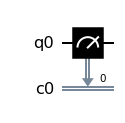

In [3]:
circ.measure(qr,cr)
circ.draw(output = 'mpl')

A more basic schematic can be created as follows:

In [4]:
circ.draw()

┌─┐
q0_0: ┤M├
      └╥┘
c0: 1/═╩═
       0

The best practice is to run any circuit on a <i>simulator</i> before using actual quantum hardware. There are only a few machines and many people trying to access them. You might end up waiting a while to do a computation, so you want to make sure it behaves as expected whenever possible. Here's how to run this circuit:

In [5]:
job = execute(circ,backend=BasicAer.get_backend('qasm_simulator'))
counts = job.result().get_counts()

In [6]:
counts

{'0': 1024}

So all 1024 times, the system was observed in the state $\left|0\right\rangle$. This is not surprising, because all we did was to create a bunch of these $\left|0\right\rangle$ states and then measure them. Now let's see what happens on a <i>real</i> quantum machine.

To access the quantum hardware, you'll need to load your [IBM Quantum account](https://www.ibm.com/quantum-computing). If you log in using a web browser, you can copy the API token and paste it into the slot below. Once you save the account <i>once</i> on a given machine, you shouldn't need to run that command ever again. ```IBMQ.load_account()``` will be all you need for future endeavors.

In [7]:
IBMQ.save_account('PASTE YOUR API HERE') #not necessary if running on IBM Quantum Lab
#comment out the above line after executing it once

IBMQ.load_account() 

configrc.store_credentials:WARNING:2022-06-01 12:55:18,017: Credentials already present. Set overwrite=True to overwrite.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

<b>Note: </b> Your default "provider" is the IBM-Q open group--th programat is the stuff that's available to everyone in the world. The IBM Quantum [Educators program](https://quantum-computing.ibm.com/programs/educators) and [Researchers program](https://quantum-computing.ibm.com/programs/researchers) programs offer additional access. If you are taking part in an IBM Quantum Challenge, you might also be granted access to other devices through a different provider. It is not necessary here, but you can change providers by uncommenting the command below and entering the provider, hub and project. Note that the system administrator will need to add your IBM Quantum account to the project for you to obtain access.

In [11]:
#uncomment below to change providers if you have additional access; disregard if you don't know what that means!

provider = IBMQ.get_provider(hub='ibm-q',group='open',project='main')
#provider = IBMQ.get_provider(hub='your-hub',group='your-group',project='your-project')

Once you're in, you need to select a machine to use. For today, you can choose ```ibm_perth``` exclusively. Generally, it's advisable to use the smallest machine possible. Note that you have access to machines (or "backends") with 1, 5, or 7 qubits. The "quantum volume" (QV) is a rough measure of how complex your circuit can be before noise and errors accumulate excessively. Using more qubits or adding more gates (increasing the "depth" of the circuit) increase the required quantum volume. We'll come back to what gates are momentarily.

If you log into your IBM Quantum account, you should find a list of all available backends. Clicking on one, you can see (a) how many qubits it contains, (b) how many jobs are currently in the queue and (c) the estimated QV of that backend. Alternatively, you can get a list of available backends on the command line:


In [12]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In general, it's probably easiest to just scan through the available backends on the website and select the smallest possible queue. Once you find one, you can set this as your quantum backend as shown below. Note that you're always free to change this machine.

<b>Important remark: </b> From time to time, older machines are retired. You might find that some devices used in this notebook are no longer available. If that's the case, just select a different device which appears when you run the command above.

In [10]:
qcomp = provider.get_backend('ibmq_armonk')

If you ever want to cut straight to the least-busy machine, you can also use 

```
qcomp = provider.get_backend(providers.ibmq.least_busy(provider.backends()))
```

Once you have a backend, you can run the circuit pretty much just as before. The ```job_monitor``` is just a convenient feature that lets you keep up with your job as it filters through the queue. 

<b>Important remark:</b> IBM uses <i>dynamic</i>, "fair share" queuing to balance loads. This means that you might get bumped or boosted in a seemingly random manner. It's still a good idea to use the machines with the smallest queues.

In [11]:
job = execute(circ,backend=qcomp)

from qiskit.tools.monitor import job_monitor
job_monitor(job)

counts = job.result().get_counts()

Job Status: job has successfully run


Once the job has run, take a look at the results. You can import the ```plot_histogram()``` function to visualize this:

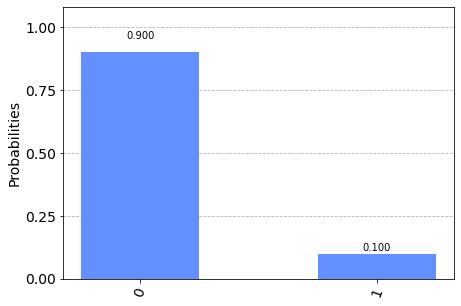

In [12]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [13]:
counts

{'0': 922, '1': 102}

Ha! So despite preparing a bunch of spins in the "up" state, we find that a few are being measured in the "down" state. These quantum machines are cooled to $\sim 15$ mK and isolated from their environment. But errors still creep into even circuits as simple as ours. It works <i>pretty</i> well, but it isn't perfect. You can try different backends with a simple circuit like this to get a sense for what that quantum volume measure means in terms of results. In general, the larger the circuit, the more error you will find.

But take a moment to congratulate yourself. You just ran a job on an actual quantum computer! The good news is that the basic process does not get much more complicated than this. So let's try to do something a little more interesting.

## Measuring other observables

Perhaps we would like to measure $\hat{S}^{x}$ instead of $\hat{S}^{z}$. Take a moment to ask yourself what kind of result you <i>expect</i> in this case.

As a practical matter, it should be noted that the only "measurement" we can make is actually the operator $\hat{S}^{z}$. In order to get around this, we can apply a trick: we simply rotate the system so that the new $z$ axis is aligned with the orignal $x$ axis. By measuring $\hat{S}^{z}$ in this rotated state, we're effectively measuring $\hat{S}^{x}$ on the original state. Sneaky, huh?

But <i>how</i> do we "rotate" the system? To actually do anything interesting to these qubits, we apply <b>quantum gates</b> which change the state of the system. You can think of these gates as unitary operators. For example, there is a gate $X$ which corresponds to the operator $\hat{S}^{x}$ with the same ($Y$ and $Z$) for $\hat{S}^{y}$ and $\hat{S}^{z}$. I will introduce various gates as we need them, but you can read all about them in the Qiskit [textbook](https://qiskit.org/textbook/ch-states/single-qubit-gates.html).

Quite conveniently for us, there are rotation gates, $R_{x}(\theta)$, $R_{y}(\theta)$, and $R_{z}(\theta)$, which rotate the system about $x$, $y$, or $z$ by an angle $\theta$. 

Now, conceptually, what we want to do is the following: imagine rotating the coordinate system by -90 degrees about the positive $y$ axis as shown below. If a spin were aligned perfectly along in the $+x$ direction, such a rotation would bring this spin into alignment with the $z$ axis. Performing a measurement, one would conclude the <i>rotated</i> system was in the state $\left|0\right\rangle$ (or, "spin up"). So measuring the so-called computational basis (or, $\hat{S}^{z}$) after a rotation is equivalent to measuring $\hat{S}^{x}$ in the original system.

The whole trick for measuring spin along <i>any</i> direction is to first rotate the system. If we wish to measure spin along some unit vector $\hat{n}(\theta,\phi)$, we can rotate the system by an amount $-\phi$ about the $z$ axis and then $-\theta$ about the $y$ axis. Such a series of operations will bring $\hat{n}(\theta,\phi)$ into alignment with the $z$ axis.


![axes](images/nhat.png)

All that remains is to simply add some rotation gates. To measure spin along the $x$ axis ($\theta = \frac{\pi}{2}$, $\phi = 0$) we simply need to rotate the system by $-\frac{\pi}{2}$ about the $y$ axis to map spin up/down (in this direction) to the computational basis (eigenstates of $\hat{S}^{z}$). The rotation gates can be accessed as ```rx(angle,qbit)```, ```rx(angle,qbit)```, ```rx(angle,qbit)```, where ```angle``` is the desired rotation angle and ```qubit``` specifies which qubit to rotate.


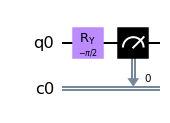

In [14]:
circ2 = QuantumCircuit(qr,cr)
circ2.ry(-np.pi/2,0)
circ2.measure(qr,cr)
circ2.draw('mpl')

So this circuit should simulate measuring $\hat{S}^{z}$ on the state $\left|+\right\rangle$. As you know, you cannot calculate what a given measurement should return. But you can calculate <i>expectation values</i>. This term is terribly misleading because we know that any individual measurement should return an eigenvalue of the operator being measured. The expectation value is simply the <i>expected</i> average of a large number of measurements repeated on identically prepared systems. What do you expect for $\left\langle \hat{S}^{x}\right\rangle$?

Let's see what the quantum computer gives!

In [15]:
job_sim = execute(circ2,backend=BasicAer.get_backend('qasm_simulator'))
counts_sim = job_sim.result().get_counts()

job_qc = execute(circ2,backend=qcomp)
job_monitor(job_qc)

counts_qc = job_qc.result().get_counts()

Job Status: job has successfully run


We can look at the simulator counts as well as the counts from the actual quantum device:

In [16]:
counts_sim

{'0': 512, '1': 512}

In [17]:
counts_qc

{'0': 489, '1': 535}

Even the simulator results will differ slightly from case to case due to statistical fluctuations, but you should see roughly 50/50 split between the state being $\left|0\right\rangle$ and $\left|1\right\rangle$. Recall that we <i>rotated</i> the system before the measurement, so we now interpret $\left|0\right\rangle\rightarrow \left|+\right\rangle_{x}$ and $\left|1\right\rangle \rightarrow \left|-\right\rangle_{x}$ (instead of $\left|+\right\rangle$ and $\left|-\right\rangle$, respectively. This 50/50 split is consistent with $\left\langle \hat{S}^{x}\right\rangle = 0$, as one would expect for $\left|\psi\right\rangle = \left|+\right\rangle$.

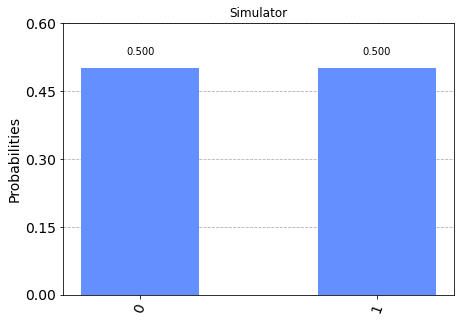

In [20]:
plot_histogram(counts_sim, title="Simulator")

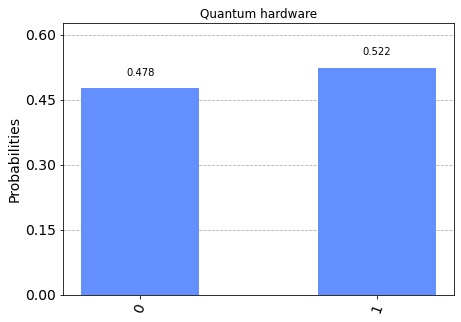

In [21]:
plot_histogram(counts_qc, title="Quantum hardware")

## Generating arbitrary states

So far, we have seen how to perform basic measurements of spin about any arbitrary direction. But we always begin with the same initial state, $\left|0\right\rangle \rightarrow \left|+\right\rangle$. Is it possible to generate other states?

Absolutely. I will note that we <i>could</i> just be really clever and show how what we have developed can be used directly to measure any component of spin for any initial state. We don't actually need to generate a state and rotate the desired measurement direction into the computational basis. But sometimes one operation is more convenient than the other. And for the case of <i>multiple</i> qubits, it's convenient to think of state initialization and measurement rotations as two separate processes. 

So let's begin!

Mathematically, how does one generate the state $\alpha\left|+\right\rangle + \beta \left|-\right\rangle$ from the state $\left|+\right\rangle$? This is equivalent to generating a vector by the following operation

$$\left(\begin{array}{c} \alpha\\ \beta \end{array}\right) = \hat{U}\left(\begin{array}{c}1\\ 0\end{array}\right).$$

The question becomes: what is $\hat{U}$ and how can I represent $\hat{U}$ as a quantum gate? We have already encountered the rotation gates, but there are much more general gates we can employ. First, let us note that $\alpha$ and $\beta$ are rather restricted. To ensure the state is normalized, we have $\left|\alpha\right|^{2} + \left|\beta\right|^{2} = 1$. Additionally, the overall phase of a state is physically unobservable.  That is, $e^{i\delta}\left|\psi\right\rangle$ is physically indistinguishable from $\left|\psi\right\rangle$. Putting these conditions together, we could parameterize the two complex numbers $\alpha$ and $\beta$ as two real numbers, $\theta$ and $\phi$,

$$\left(\begin{array}{c} \alpha\\ \beta \end{array}\right) \equiv \left(\begin{array}{c} \cos\frac{\theta}{2}\\ e^{i\phi}\sin\frac{\theta}{2} \end{array}\right)$$

As it happens, the most general single-qubit gate corresponds to the following operator:

$$\hat{U}(\theta,\phi,\lambda) \;\;\dot{=} \left(\begin{array}{cc} \cos\frac{\theta}{2} & -e^{i\lambda}\sin\frac{\theta}{2} \\ e^{i\phi}\sin\frac{\theta}{2} & e^{-i(\lambda + \phi)}\cos\frac{\theta}{2}\end{array}\right)$$

Here I use the symbol $\dot{=}$ to make a distinction between the physical gate used in a real quantum computer to change the physical state of the system and the mathematical represenation of states as vectors and operators as matrices. You should verify that $\hat{U}\left|+\right\rangle$ <i>does</i> return the state $\cos\frac{\theta}{2}\left|+\right\rangle + e^{i\phi}\sin\frac{\theta}{2}\left|-\right\rangle$. 

The proper syntax for adding a $U$ gate to act on qubit ```q``` some circuit ```mycirc``` is ```mycirc.u(theta,phi,lambda,q)```. Here are some optional exercises you can complete by copying, pasting, and lightly modifying statements above.

<b>Exercise: </b> Use what you know to generate the state $\left|+\right\rangle_{y} = \frac{1}{\sqrt{2}}\left(\left|+\right\rangle + i\left|-\right\rangle\right)$ and measure $\hat{S}^{x}$, $\hat{S}^{y}$, and $\hat{S}^{z}$. Note that based on what we've talked about, you'll need to design three separate circuits. Make sure to get simulator data and actual results. Before doing <i>any</i> programming, work out the values of $\theta$ and $\phi$ that you need (you can set $\lambda = 0$).

Also note: to measure $\hat{S}^{y}$, you'll have to perform <i>two</i> rotations before performing the measurement in the computational basis.

In [22]:
# Note that you can insert cells using the "+" button in the upper left (just under "File").

<b>Challenge Exercise: </b> The histogram is a convenient means of visualizing the probabilities. But we can also quantify a statistical uncertainty from these measurements. Such an uncertainty is based on the variance of the measurements. The effective uncertainty $\delta S^{z}$ is given by the standard error of the mean

<!---$$\sigma^{2}_{S^{z}} = \frac{\left(\pm\frac{\hbar}{2}\right)^{2} + \left(\pm\frac{\hbar}{2}\right)^{2} + \cdots + \left(\pm\frac{\hbar}{2}\right)^{2}}{N} = \frac{\hbar^{2}}{4}$$--->

$$\delta S^{z} = \frac{\sigma_{S^{z}}}{\sqrt{N}}$$,

where $\sigma_{S^{z}}$ is the standard deviations in the measurements of $\hat{S}^{z}$. Thus, you can report the result as the expectation value, plus-or-minus some effective uncertainty. Calculate the expectation values explicitly for $\left\langle \hat{S}^{x}\right\rangle$, $\left\langle \hat{S}^{x}\right\rangle$, $\left\langle \hat{S}^{x}\right\rangle$ for the state $\left|+\right\rangle_{y} = \frac{1}{\sqrt{2}}\left(\left|+\right\rangle +i\left|-\right\rangle\right)$.

To accomplish this, you'll need to a little bit of Python dictionary gymnastics. Your counts are stored as a dictionary, meaning it's of the form:

```
{'0': 584, '1': 440}
```

You can retrieve actual counts by calling ```counts_sx['0']``` (which would return ```584```. The only hiccup is that in the case all the counts were (say) ```'1'```, ```counts_sx['0']``` would return an error. So you might need to check for the case where only one key exists and manually add the other entry with zero counts. Something like this would work:

```
if (len(counts_sx)==1):
    if (list(counts_sx.keys())[0]=='0'):
        counts_sx['1']=0
    else:
        counts_sx['0']=0
```

<a id='part2'></a>

----
# Part II: Stern-Gerlach Experiment using a Quantum Computer
-----------------

In the last activity, we introduced some basic aspects of how to use quantum computers to simulate a single spin-$\frac{1}{2}$ degree of freedom. Of particular importance were:

1. An arbitrary two-level state can be created from the default initialization $\left|+\right\rangle$ by application of $\hat{U}(\theta,\phi,\lambda)$ for suitable choices of $\theta$, $\phi$ with $\lambda = 0$.
2. The spin projection of a state can be measured in any direction $\hat{n}(\theta,\phi)$ by appropriately rotating the state before performing a standard measurement of $\hat{S}^{z}$ (i.e., the "computational basis").

In today's endeavor, we will build on these ideas to construct a simulation of the famous Stern-Gerlach experiment. The term "simulation" refers to the actual quantum processes taking place on transmon qubits rather than spins, to be distinguished from the classical "simulator" used by the [SPINS](http://sites.science.oregonstate.edu/~mcintyre/ph425/spins/) program to generate sample data.

To streamline the process somewhat, let us begin by defining several measurement functions. The goal is to be able to <i>use</i> a bunch of quantum circuits to get results. The manual construction of gates associated with spin component measurments becomes quite tedious. It will be assumed that a circuit has been defined of the form

```
qr = QuantumRegister(nq)
cr = ClassicalRegister(nc)
circuit = QuantumCircuit(qr,qc)
```

Given this (empty) circuit, the qubits will always be initialized to $\left|+\right\rangle$. Our task will be to perform successive measurements of various spin components. The following functions will create such measurements:

In [23]:
def measure_sx(circuit,qreg,creg):
    circuit.ry(-np.pi/2,qreg)
    circuit.measure(qreg,creg)
    circuit.ry(np.pi/2,qreg)
    return circuit

def measure_sy(circuit,qreg,creg):
    circuit.rz(-np.pi/2,qreg)
    circuit.ry(-np.pi/2,qreg)
    circuit.measure(qreg,creg)
    circuit.ry(np.pi/2,qreg)
    circuit.rz(np.pi/2,qreg)
    return circuit

def measure_sz(circuit,qreg,creg):
    circuit.measure(qreg,creg)
    return circuit

<b>Important warning: </b> The above functions will rotate the system, perform the measurement, and then <i>un-rotate</i> the system. This is perhaps the easiest conceptual way to approach repeated measurements. However, it's far from the most efficient approach. One could design each compound circuit from scratch to reduce the number of gates. For our purposes (and certainly with simulator results), this shouldn't matter much. But if you want to do quantum computing for a living, you'll want to pay much more attention to doing things with as few gates as possible. 

With that disclaimer out of the way, let's get going and take a single spin represented by a single qubit. Implicitly, the initialization of the qubit in the state $\left|0\right\rangle$ represents a measurement of $\hat{S}^{z}$ on an unpolarized beam followed by discarding all the spins in state $\left|-\right\rangle$.

So here's a simple task: imagine we wish to perform the following sequence of measurements (screenshot from [SPINS Java app](http://sites.science.oregonstate.edu/~mcintyre/ph425/spins/)):

![Stern-Gerlach setup](images/sg1a.png)

It's important to note that the IBM quantum hardware essentially takes care of the first measurement and only feeds us the $\left|+\right\rangle$ states which emerge from the first analyzer. Of course it doesn't actually generate the states this way, but for purposes of simulation we can pretend that's what's happening. 

Our job is just to complete the circuit, which just involves measuring $\hat{S}^{x}$:

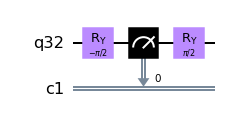

In [24]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

circ = QuantumCircuit(qr,cr)
circ = measure_sx(circ,0,0)
circ.draw('mpl')

Recall that the measurement process takes the state of qubit and writes it to the classical register, which is just a blank set of slots (also initialized to zero). When we begin taking multiple measurements, we'll need to write to different slots on the classical register to record all the measurements. 

But for now, this should do it. Let's see what happens. For simplicity, we'll run the simulator and an actual device and show both sets of results on the same histogram:

In [27]:
job = execute(circ,backend=BasicAer.get_backend('qasm_simulator'),shots=1024)
counts = job.result().get_counts()

#here I'm changing the device; check the queue and find one of the "lower queue" devices
qcomp = provider.get_backend('ibmq_belem')
job = execute(circ,backend=qcomp)

from qiskit.tools.monitor import job_monitor
job_monitor(job)

counts_q = job.result().get_counts()

Job Status: job has successfully run


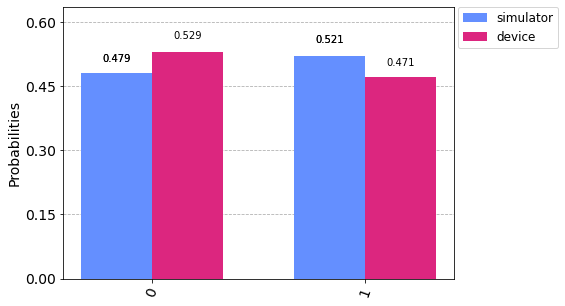

In [28]:
plot_histogram([counts,counts_q],legend=['simulator','device'])

Recall that we need to interpet '0' or '1' as '+' or '-' <i>in this basis for which the measurment is performed</i>. We conclude that of all the spins initialized in $\left|+\right\rangle$, about half were measured to be $\left|+\right\rangle_{x}$ while the other half were measured to be in $\left|-\right\rangle$. So far nothing too magical.
    
Surely, measuring $\hat{S}^{z}$ one more time would return $+$ for all measurements since the state began in that eigenstate. We can explore this by adding another measurement. Since this will require a larger classical register to store two measurements, we'll just redo the circuit:

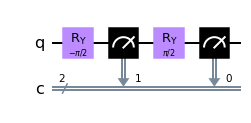

In [29]:
qr = QuantumRegister(1,'q')
cr = ClassicalRegister(2,'c')

circ = QuantumCircuit(qr,cr)
circ = measure_sx(circ,0,1)
circ = measure_sz(circ,0,0)
circ.draw('mpl')

One potentially confusing item (at least for me): It appears the the classical register state appears written right-to-left. I tend to think left-to-right in most cases, so I have written the first measurement to ```cr[1]``` and the second to ```cr[0]```. It doesn't matter which measurement gets stored where, but (as of the time of writing this) this appears be necessary to get an output that can be read from left to right (but more on this below!). For completion, here is the Stern-Gerlach setup being used:

<img src="images/sg2.png" alt="sg2" width="600"/>

As before, the initialization on the backend takes care of the first $\hat{S}^{z}$ measurement. Note that the Stern-Gerlach experiment only feeds the $\left|+\right\rangle_{x}$ into the final analyzer. There is nothing in our quantum circuit that makes this restriction, but we will be able to account for this once we get the counts--the joys of post-processing!

So let's run this thing and see what happens:

In [30]:
job = execute(circ,backend=BasicAer.get_backend('qasm_simulator'),shots=1024)
counts = job.result().get_counts()

job = execute(circ,backend=qcomp)
job_monitor(job)

counts_q = job.result().get_counts()

Job Status: job has successfully run


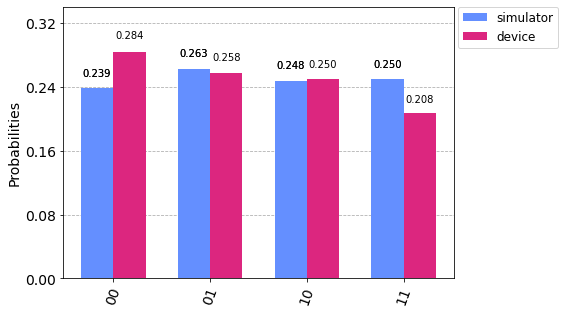

In [31]:
plot_histogram([counts,counts_q],legend=['simulator','device'])

Crudely, it looks like about a quarter of the initial $\left|+\right\rangle$ spins go into each state. There's a bit to unpack here, so let's do it carefully.

The classical register stores the outcomes ('0' or '1' in qubit language corresponding to '+' or '-' in spin language) of a single measurement. Our "counts" tell us all of the classical register states and how many times each was observed. 

Let's start with '00'. In the spin language, this is '++'. But the register doesn't record the measurement direction, so we have to reintroduce that information when interpreting what it means. Recalling that we begin with a state $\left|+\right\rangle$, we measured $\hat{S}^{x}$ and then measured $\hat{S}^{z}$. Thus, the state labeled by '00' means the measurment of $\hat{S}^{x}$ returned +$\frac{\hbar}{2}$, projecting the system into the eigenstate $\left|+\right\rangle_{x}$, and the subsequent measurement of $\hat{S}^{z}$ resulted in $+\frac{\hbar}{2}$. Since the initialization <i>gave</i> us a state with $S^{z} = + \frac{\hbar}{2}$, this all seems quite reasonable.

But the <i>funny</i> business concerns the existence of states '01' and '11'. The second register element being '1' indicates that the $\hat{S}^{z}$ measurement returned $-\frac{\hbar}{2}$. This is bizarre because it's like observing that an apple is red, tasting it to find that it is sweet, and then looking to see that it is green. Well that's a sloppy analogy, but no analogy is perfect.


Let's dive in to examine this more deeply. In the following exercises, you're going to make some simple modifications to the circuits presented above.

<b>Exercise: </b> Perhaps a quantum measurement simply kicks the state randomly. Reconfigure the circuit to simply measure $\hat{S}^{z}$ twice. Interpret your result in words.

<b>Exercise: </b> Instead of $\hat{S}^{z}$, try measuring $\hat{S}^{x}$ twice. Are the results the same as the previous case? Why or why not?

<b>Exercise</b>: Open the SPINS program and run the following simulation:

<img src="images/spins1.png" alt="spins1" width="600"/>

Now construct a quantum circuit to simulate this case. Note that the Stern-Gerlach setup only <i>analyzes</i> the $\hat{S}^{x}$ states without recording a measurement. You can mimic this by modifying the function ```measure_sx()``` to ```analyze_sx()``` as follows:

```
def analyze_sx(circuit,qreg,creg):
    circuit.ry(-np.pi/2,qreg)
    #circuit.measure(qreg,creg)
    circuit.ry(np.pi/2,qreg)
    return circuit
```

This is sloppy programming, but it emphasizes that all you're changing is to delete the actual measurement. The rotation (and anti-rotation) still takes place and represents the "analyzing" done in the SPINS software. 

Interpret your results.

<b> (*) Challenge Exercise: </b> If you find yourself yearning for more, here's a fun task. This part is covered in detail in the next section, but it might be a fun thing to play with before looking. 

It's actually possible to "thread" parameters in such a way that you can send a whole series of circuits to be evaluated at once (well, one after the other). We'll use this shortly, but here's an opportunity to jump ahead and look at what happens as one slowly varies the "middle" spin analyzer:

<img src="images/sg3.png" alt="sg3" width="600"/>

Suppose $\hat{n} = \hat{n}(\theta,0)$ with $0\leq \theta \leq 2\pi$. You can sample $\theta$ over this range to see how the final counts vary as a function of $\theta$. The main goal of this question is to make a plot of $\left\langle \hat{S}^{z}\right\rangle$ as measured at the final circuit as a function of $\theta$. Some potentially useful hints follow:

- You can measure spin about some arbitrary axis with the following function

```
def measure_stheta(circuit,theta,phi,qreg,creg):
    circuit.rz(-phi,qreg)
    circuit.ry(-theta,qreg)
    circuit.measure(qreg,creg)
    circuit.ry(theta,qreg)
    circuit.rz(phi,qreg)
    return circuit
```

- To loop your circuit over several values of $0<\theta<2\pi$, you can define the following:

```
from qiskit.circuit import Parameter
Ntheta = 75
theta = Parameter('θ')
theta_range = np.linspace(0, 2*np.pi, Ntheta)
```

   Note that if you want to use Greek characters in Code cells, you can type ```\theta``` and then hit the ```TAB``` key. But if you want to "cheat," you can also just copy and paste the code blocks in this cell. I didn't tell you that, but maybe you already figured it out.

   <b>Important warning: </b> Different backends have different allowed numbers of circuits that they can take in a single job. It seems 75 is safe for most as of the time of writing this, but you should always check the backends by logging in to the IBM Quantum site. But the worst that will happen is that you get an error that pretty clearly tells you ```Ntheta``` was too large. 
   
   To actually execute a circuit over multiple values of $\theta$, you can write something like
   
```
job = execute(circuit,
          backend=BasicAer.get_backend('qasm_simulator'),
          parameter_binds=[{theta: theta_val} for theta_val in theta_range])
                 
counts = job.result().get_counts()
```

In the sample command above, the QASM simulator is used. It's assumed that you have already constructed the ($\theta$-dependent) circuit at this point. Remember to use the ```job_monitor(job)``` command to get some real-time update on how your job is fairing in the queue! To run it on actual quantum hardware, you just have to call a real backend instead of the simulator (as we've done several times). The rest of the command should remain as is.

- Lastly, it's a nontrivial task to make sense of the results once you run such a job. You should take a moment to just print out what ```counts``` looks like. It is actually a nested list, where each inner layer is a dictionary giving the counts for each of the possible classical register states. Your actual circuit makes two measurements (spin along $\hat{n}$ followed by spin along $z$), so if you print out ```counts```, you should see something like

```
[{'00': 1024},
 {'00': 1023, '11': 1},
 {'00': 1009, '01': 7, '11': 8},
 {'00': 985, '11': 19, '01': 19, '10': 1},
 {'00': 963, '01': 29, '11': 31, '10': 1},
 {'00': 940, '11': 45, '01': 36, '10': 3},
 {'00': 911, '01': 62, '11': 45, '10': 6},
 {'01': 64, '00': 872, '10': 10, '11': 78},
 ...]
 ```
 
 That is, you get a collection of lists ```{...}``` where each enclosed list contains counts for the possible two-character readings in the classical register. The immediate question is: how does one extract $\left\langle\hat{S}^{z}\right\rangle$ from all of this?
 
With such a simple set of outcomes, a quick and dirty way to make sense of this is to just manually extract the counts of each outcome for each value of $\theta$. Letting ```n00``` be the number of counts of the outcome '00', we can extract this via:

```
n00 = list(map(lambda c: c.get('00', 0), counts))
```

A similar extraction can be performed for the other states by just changing <i>both</i> instances of '00' to '01', '10', '11'. Now let's step back and think about what we're trying to do. The final digit refers to the measurement of $\hat{S}^{z}$, while the first refers to the measurement of $\hat{S}^{x}$. Since we are <i>only</i> taking the "up" states from that $\hat{S}^{x}$ measurement, the only states relevant to our measurement are '00' and '01', since '10' and '11' refer to states discarded after the $\hat{S}^{x}$ measurement. To get an experimental value for $\left\langle \hat{S}^{z}\right\rangle$, we therefore just need to take an average over the relevant states.

Noting that '00' corresponds to $S^{z}\rightarrow +\frac{\hbar}{2}$ and '01' corresponds to $S^{z}\rightarrow -\frac{\hbar}{2}$, we let $\hbar = 1$ for simplicity and compute the average as

$$\left\langle \hat{S}^{z}\right\rangle = \frac{1}{2}\frac{\texttt{n00}-\texttt{n01}}{\texttt{n00} + \texttt{n01}}$$

This can be performed computationally within a simple loop:

```
Sz = zeros(Ntheta)

for i in range(0,Ntheta):
    Sz[i] = 0.5*(n00[i]-n01[i])/(n00[i]+n01[i])
```

The ```if``` statement is just a formality. If you follow all of these steps, you should be able to generate an informative plot via

```
plt.plot(theta_range,Sz,'b.')
plt.show()
```

One last question: a general state is given by $\left|\psi\right\rangle = \cos\frac{\theta}{2}\left|+\right\rangle + e^{i\phi}\sin\frac{\theta}{2}\left|-\right\rangle$. We have essentially rotated the state through the range $0<\theta<2\pi$. What happens to the wavefunction upon $\theta\rightarrow\theta + 2\pi$? Does the state actually return "to itself?"

<b>Spoiler: </b> It <i>doesn't!</i> But are there any observable consequences?

<b>Spoiler of the spoiler: </b> It's subtle. We have much to learn!

<a id='part3'></a>

-----
# Part III: Time evolution of single spins
-----

In this activity, we are going to explore the simulation of time evolution in single spin systems. For a quantum state $\left|\psi\right\rangle$, time evolution is governed by the Schrödinger equation,

$$i\hbar \frac{d}{dt}\left|\psi\right\rangle = \hat{H}\left|\psi\right\rangle.$$

For now, we'll assume a time-independent Hamiltonian. In particular, the relevant Hamiltonian for a spin in a constant magnetic field ${\bf B}$ is

$$\hat{H} = -\lambda {\bf B}\cdot\hat{\bf S},$$

where $\lambda$ is some constant proportional to the magnetic moment of the spin and $\hat{\bf S} = \hat{S}^{x}\hat{\bf x} +  \hat{S}^{y}\hat{\bf y} + \hat{\bf z} \hat{S}^{z}\hat{\bf z}$. 

As an example, let's suppose $\left|\psi(0)\right\rangle = \left|+\right\rangle$ and ${\bf B} = B_{0}\hat{y}$ for some constant $B_{0}$. For this case, the Hamiltonian simplifies to

$$\hat{H} \rightarrow -\frac{\lambda B_{0}\hbar}{2}\sigma^{y} \;\;\dot{=}\;\; -\hbar\omega\left(\begin{array}{cc} 0 & -i\\ i & 0\end{array}\right),$$

where $\omega \equiv \lambda B_{0}/2$. The fundamental problem in quantum dynamics is to predict the probabilities of measurement outcomes or expectation values at some time $t$ given a Hamiltonian $\hat{H}$ and an initial state for the system, $\left|\psi(0)\right\rangle$. We first consider this simple example for which it is straightforward to solve the Schrödinger equation exactly. A formal integration gives

$$\left|\psi(t)\right\rangle = e^{-i\hat{H}t/\hbar}\left|\psi(0)\right\rangle$$,

where 

$$e^{-i\hat{H}t/\hbar} = e^{i\omega t\sigma^{y}}.$$

We can compute the exponential of a matrix by using the Taylor expansion of the exponential function as a definition.

$$e^{i\omega t\sigma^{y}} \equiv \hat{I} + i\omega t\sigma^{y} + \frac{(i\omega t\sigma^{y})^{2}}{2!} + \frac{((i\omega t\sigma^{y})^{3}}{3!} + \frac{(i\omega t\sigma^{y})^{4}}{4!} + \cdots.$$

Using $(\sigma^{y})^{2} = \hat{I}$ and $i^{2} = -1$, one may group even and odd terms

$$e^{i\omega t\sigma^{y}} = \hat{I}\left[1 - \frac{(\omega t)^{2}}{2!} + \frac{(\omega t)^{4}}{4!} + \cdots\right] + i\sigma^{y}\left[\omega t - \frac{(\omega t)^{3}}{3!} + \frac{(\omega t)^{5}}{5!} + \cdots\right].$$

The series in brackets are cosine and sine Taylor expansions, respectively. Writing out $\hat{I}$ and $\sigma^{y}$ as explicit matrices, we get

$$e^{i\omega t\sigma^{y}} = \hat{I}\cos(\omega t) + i\sigma^{y}\sin(\omega t) \;\;\dot{=}\;\; \left(\begin{array}{cc} \cos(\omega t) & \sin(\omega t)\\ -\sin(\omega t) & \cos(\omega t)\end{array}\right)$$

Now recall the general $\hat{U}(\theta,\phi,\lambda)$ gate 

$$\hat{U}(\theta,\phi,\lambda) \;\;\dot{=} \left(\begin{array}{cc} \cos\frac{\theta}{2} & -e^{i\lambda}\sin\frac{\theta}{2} \\ e^{i\phi}\sin\frac{\theta}{2} & e^{i(\lambda + \phi)}\cos\frac{\theta}{2}\end{array}\right)$$

Then the time evolution is equivalent to the following $\hat{U}$ gate:

$$e^{-i\hat{H}t/\hbar} = \hat{U}(2\omega t,\pi,\pi),$$

or $\left|\psi(t)\right\rangle = \hat{U}(2\omega t,\pi,\pi)\left|+\right\rangle$. Exponentiating the Hamiltonian explicitly is rarely the most efficient way to solve for time dynamics analytically. See one of the [many](https://www.springer.com/gp/book/9780306447907) [excellent](https://www.pearson.com/us/higher-education/program/Mc-Intyre-Quantum-Mechanics/PGM64990.html) [textbooks](https://www.cambridge.org/highereducation/books/introduction-to-quantum-mechanics/990799CA07A83FC5312402AF6860311E#overview) on QM (or just Section IIA in [this paper](https://linus.highpoint.edu/~jlancaster/papers/su3.pdf) paper) for the standard approach. But this approach does lend itself to an efficient quantum circuit design for calculating spin dynamics.

The basic features of the circuit will be:

1. Generate the initial quantum state $\left|\psi(0)\right\rangle$ through an appropriate unitary transformation of the default initialization $\left|+\right\rangle$.
2. Perform time evolution by applying the gate(s) corresponding to $e^{-i\hat{H}t/\hbar}$.
3. Measure desired observables by appropriate rotation followed by measurement in computational basis.

For our first example, we take $\left|\psi(0)\right\rangle = \left|+\right\rangle$, so no rotation is required before performing step 2. In this first example, let us compute the expectation values $\left\langle \hat{S}^{x}\right\rangle$, $\left\langle \hat{S}^{y}\right\rangle$, $\left\langle \hat{S}^{z}\right\rangle$. To be economical, we can actually embed three copies of the single-spin circuit which only differ in the final gates which select the appropriate spin component for measurement. 

In order to measure the system at a range of time values (say $0\leq \omega t\leq 2\pi$), we can define $\tau = \omega t$ as a parameter.

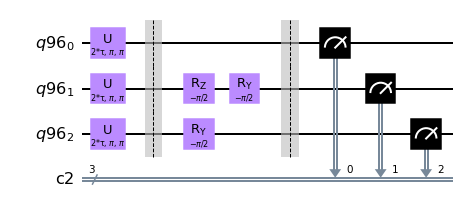

In [32]:
from qiskit.circuit import Parameter
tau = Parameter('τ')
Nt = 75
qr = QuantumRegister(3)
cr = ClassicalRegister(3)

timecirc = QuantumCircuit(qr,cr) 

#no initial unitary transformation since |ψ(0)> = |+>

timecirc.u(2*tau,np.pi,np.pi,qr) #apply exp(-iHt/ħ)
timecirc.barrier(qr)
timecirc.ry(-np.pi/2,2) #rotation to measure <Sx>

timecirc.rz(-np.pi/2,1) 
timecirc.ry(-np.pi/2,1) #rotation to measure <Sy>
timecirc.barrier(qr)
#no rotation needed to measure <Sz>

timecirc.measure(qr,cr)
timecirc.draw('mpl')

Next, we define the range for $\tau$ and run on the simulator for some number of shots.

In [33]:
tau_range = np.linspace(0, 2*np.pi, Nt)
Nshots = 8192

job = execute(timecirc,
              backend=BasicAer.get_backend('qasm_simulator'),shots=Nshots,
              parameter_binds=[{tau: t_val} for t_val in tau_range])

simcounts = job.result().get_counts()

Now we must pay the price for lumping three separate single-spin circuits onto a single three-spin circuit. Recall that the measurements will consist of which (total) state was counted, which specifies the state of all three spins in one three-character output. For instance, ```'000'``` refers to all three spin components being measured as up, while ```'001'``` refers to the $x$ and $y$ components being measured $+\frac{\hbar}{2}$, while the $z$ component was measured as $-\frac{\hbar}{2}$. At each time step we are interested in the overall counts for each component indepedently from the states of the others. Later, we will allow interactions between individual spins so that the entire configuration becomes important. But for now, we need to tally the +/- counts for each component while ignoring the states of the others.

For example, to obtain $\left\langle \hat{S}^{x}\right\rangle$, we need to compute

$$\left\langle \hat{S}^{x} \right\rangle = \frac{(\mbox{no. of 0 measurements})\times \frac{\hbar}{2} + (\mbox{no. of 1 measurements})\times \left(-\frac{\hbar}{2}\right)}{N_{shots}}$$ 

The number of '0' measurements refers only to the first spin, so we need to add contributions from ```'000'```, ```'001'```, ```'010'```, and ```'011'```. The remaining four states have a '1' in the first slot, so the sum of these represents the total number of shots for which this spin projection came out as $-\frac{\hbar}{2}$. Thus if we label the number of ```000``` measurements as $\texttt{c000}$ and similarly for the other seven states,

$$\left\langle \hat{S}^{x}\right\rangle = \frac{\hbar}{2}\frac{\texttt{c000} + \texttt{c001} + \texttt{c010}+ \texttt{c011}- \texttt{c100}- \texttt{c101}- \texttt{c110}- \texttt{c111}}{N_{shots}}.$$

Similar reasoning applies to the other components. I should emphasize that you don't <i>have</i> to do it this way. You could just as easily create three single-qubit circuits in which each circuit returned simple counts for a single component of spin. The tradeoff is that you would have to send three separate circuits to the quantum hardware.

In [34]:
c000 = np.array(list(map(lambda c: c.get('000', 0), simcounts)))
c001 = np.array(list(map(lambda c: c.get('001', 0), simcounts)))
c010 = np.array(list(map(lambda c: c.get('010', 0), simcounts)))
c011 = np.array(list(map(lambda c: c.get('011', 0), simcounts)))
c100 = np.array(list(map(lambda c: c.get('100', 0), simcounts)))
c101 = np.array(list(map(lambda c: c.get('101', 0), simcounts)))
c110 = np.array(list(map(lambda c: c.get('110', 0), simcounts)))
c111 = np.array(list(map(lambda c: c.get('111', 0), simcounts)))

Sx = 0.5*(c000+c001+c010+c011-c100-c101-c110-c111)/Nshots
Sy = 0.5*(c000+c001+c100+c101-c010-c011-c110-c111)/Nshots
Sz = 0.5*(c000+c010+c100+c110-c001-c011-c101-c111)/Nshots

We can now plot the spin expectation values as functions of $\theta$. In this simple case, it's useful to verify that this simulated circuit is actually simulating what we <i>think</i> it is. Since the time-dependent state can be computed exactly, it's straightforward to compute the time-dependent expectation values analytically (see derivation above Eq. (13) in [this](https://linus.highpoint.edu/~jlancaster/papers/su3.pdf) paper or any QM textbook),

$$\left\langle \hat{S}^{x}\right\rangle = -\frac{\hbar}{2}\sin(2\omega t),$$
$$\left\langle \hat{S}^{z}\right\rangle = \frac{\hbar}{2}\cos(2\omega t),$$

while $\left\langle \hat{S}^{y}\right\rangle = 0$. So we can plot the simulator results alongside theoretical predictions:

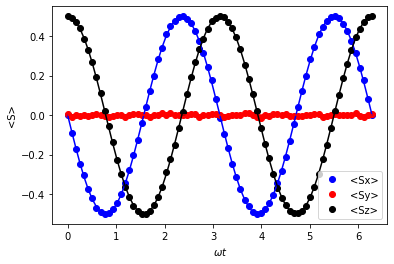

In [35]:
plt.plot(tau_range,Sx,'bo',label='<Sx>')
plt.plot(tau_range,Sy,'ro',label='<Sy>')
plt.plot(tau_range,Sz,'ko',label='<Sz>')
plt.plot(tau_range,-0.5*np.sin(2*tau_range),'b-')
plt.plot(tau_range,0*tau_range,'r-')
plt.plot(tau_range,0.5*np.cos(2*tau_range),'k-')
plt.xlabel('$\omega t$')
plt.ylabel('<S>')
plt.legend()
plt.show()

Turns out it looks pretty good! Next, we can send this to actual quantum hardware.

In [36]:
job = execute(timecirc, backend=qcomp,shots=Nshots,parameter_binds=[{tau: t_val} for t_val in tau_range])
job_monitor(job)

qcounts = job.result().get_counts()

Job Status: job has successfully run


In [39]:
cq000 = np.array(list(map(lambda c: c.get('000', 0), qcounts)))
cq001 = np.array(list(map(lambda c: c.get('001', 0), qcounts)))
cq010 = np.array(list(map(lambda c: c.get('010', 0), qcounts)))
cq011 = np.array(list(map(lambda c: c.get('011', 0), qcounts)))
cq100 = np.array(list(map(lambda c: c.get('100', 0), qcounts)))
cq101 = np.array(list(map(lambda c: c.get('101', 0), qcounts)))
cq110 = np.array(list(map(lambda c: c.get('110', 0), qcounts)))
cq111 = np.array(list(map(lambda c: c.get('111', 0), qcounts)))

Sxq = 0.5*(cq000+cq001+cq010+cq011-cq100-cq101-cq110-cq111)/Nshots
Syq = 0.5*(cq000+cq001+cq100+cq101-cq010-cq011-cq110-cq111)/Nshots
Szq = 0.5*(cq000+cq010+cq100+cq110-cq001-cq011-cq101-cq111)/Nshots

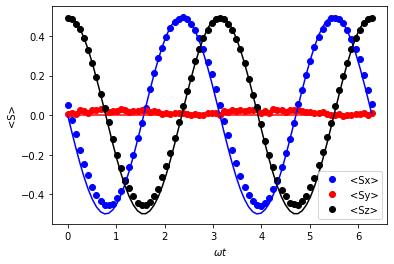

In [40]:
plt.plot(tau_range,Sxq,'bo',label='<Sx>')
plt.plot(tau_range,Syq,'ro',label='<Sy>')
plt.plot(tau_range,Szq,'ko',label='<Sz>')
plt.plot(tau_range,-0.5*np.sin(2*tau_range),'b-')
plt.plot(tau_range,0*tau_range,'r-')
plt.plot(tau_range,0.5*np.cos(2*tau_range),'k-')
plt.xlabel('$\omega t$')
plt.ylabel('<S>')
plt.legend()
plt.show()

What we see looks <i>pretty</i> good, but you'll notice that the actual data never quite gets as close to $\pm \frac{\hbar}{2}$ as the simulated data did. Errors tend to destroy coherence, and they're often quite noticeable at the peaks.

With suitable relabeling of axes, the most general Hamiltonian of the form $\hat{H} = -\lambda {\bf B}\cdot\hat{\bf S}$ one would need to consider would only depend on the relative angle between the initial spin projection and the magnetic field. For a given coordinate system, any state can be written in the form $\left|\psi(0)\right\rangle= \cos\frac{\theta_{0}}{2}\left|+\right\rangle + e^{i\phi_{0}}\sin\frac{\theta_{0}}{2}\left|-\right\rangle$, which has expectation value $+\frac{\hbar}{2}$ for spin projection measured along the direction given by $\hat{n}(\theta_{0},\phi_{0})$. So we could simply relabel the $z$ axis to point in this direction, take the state to be $\left|+\right\rangle$, and then work out the new orientation of the magnetic field in this coordinate system. 

But it's an instructive exercise to use what we've built to tackle the general problem of computing the time evolution of an arbitrary spin state in an arbitrary magnetic field.

Suppose ${\bf B} = B_{0}\hat{x}$. The corresponding time-evolution operator takes the form

$$\exp\left[-i\hat{H}t/\hbar\right] = \exp\left[i\omega t\sigma^{x}\right]$$

We can calculate the explicit matrix representation of this operator and write it in terms of the gate $\hat{U}(\theta,\phi,\lambda)$. Then do the same for ${\bf B} = B_{0}\hat{z}$.

Performing a Taylor expansion of the matrix exponential, one finds (after identical steps taken above and making use of $(\sigma^{x})^{2} = \hat{I}$)
    
$$\exp\left[i\omega t\sigma^{x}\right] = \hat{I}\left[1-\frac{(\omega t)^{2}}{2!} + \frac{(\omega t)^{4}}{4!} + \cdots\right] + i\sigma^{x}\left[\omega t - \frac{(\omega t)^{3}}{3!} + \frac{(\omega t)^{5}}{5!} + \cdots\right] = \cos(\omega t)\hat{I} + i\sin(\omega t)\sigma^{x}$$

Thus

$$\exp\left[i\omega t\sigma^{x}\right] \dot{=} \left(\begin{array}{cc} \cos(\omega t) & i\sin(\omega t)\\ i\sin(\omega t) & \cos(\omega t)\end{array}\right)$$

Upon comparing this to the form of $\hat{U}(\theta,\phi,\lambda)$, we see

$$\exp\left[i\omega t\sigma^{x}\right] = \hat{U}\left(2\omega t, \frac{\pi}{2}, -\frac{\pi}{2}\right).$$

Repeating the broad strokes for $\sigma^{z}$,

$$\exp\left[i\omega t\sigma^{z}\right] = \cos(\omega t)\hat{I} + i\sin(\omega t)\sigma^{z} \;\;\dot{=}\;\; \left(\begin{array}{cc} \cos(\omega t)+i\sin(\omega t) & 0 \\ 0 & \cos(\omega t) - i\sin(\omega t)\end{array}\right)  \;\;=\;\;\left(\begin{array}{cc} e^{i\omega t} & 0 \\ 0 & e^{-i\omega t}\end{array}\right)$$

Representing this as a unitary gate is a little trickier, but if we factor out $e^{i\omega t}$, we see that

$$\exp\left[i\omega t\sigma^{z}\right] = e^{i\omega t}\hat{U}(0,0,-2\omega t)$$

Recalling that the overall phase of a state is not measureable, we can simply ignore that prefactor. Thus

$$\exp\left[i\omega t\sigma^{x}\right] \Rightarrow \hat{U}\left(2\omega t, \frac{\pi}{2}, -\frac{\pi}{2}\right).$$
$$\exp\left[i\omega t\sigma^{y}\right] \Rightarrow \hat{U}\left(2\omega t, \pi, \pi\right).$$
$$\exp\left[i\omega t\sigma^{z}\right] \Rightarrow \hat{U}\left(0,-\omega t, -\omega t\right).$$

At first glance, it might seem as we have all we need to compute the time-evolution operator for a general magnetic field direction, since 

$${\bf B}\cdot\hat{\bf S} = B_{x}\hat{S}^{x} + B_{y}\hat{S}^{y} + B_{z}\hat{S}^{z}$$

So as a simple case, consider ${\bf B} = \frac{B_{0}}{\sqrt{2}}\hat{\bf x} + \frac{B_{0}}{\sqrt{2}}\hat{\bf y}$. Turning the crank, we find

$$\exp\left[-i\hat{H}t/\hbar\right] = \exp\left[i\frac{\omega t}{\sqrt{2}}\sigma^{x} + i\frac{\omega t}{\sqrt{2}}\sigma^{y}\right]$$

One would like to split the exponential according to $e^{a+b} = e^{a}e^{b}$ so that

$$\exp\left[-i\hat{H}t/\hbar\right] \longrightarrow \exp\left[i\frac{\omega t}{\sqrt{2}}\sigma^{x}\right]\exp\left[i\frac{\omega t}{\sqrt{2}}\sigma^{y}\right] \longrightarrow \hat{U}\left(\sqrt{2}\omega t, \pi, \pi\right)\hat{U}\left(\sqrt{2}\omega t, \frac{\pi}{2}, -\frac{\pi}{2}\right)$$

But for <i>matrices</i>, it's only true that $e^{\hat{A}+\hat{B}} = e^{\hat{A}}e^{\hat{B}}$ <i>if</i> $\hat{A}$ and $\hat{B}$ commute, $\left[\hat{A},\hat{B}\right] = 0$. Unfortunately for us, it's well known (and easily verified) that $\left[\sigma^{x},\sigma^{y}\right] = 2i\sigma^{z} \neq 0$.

This leaves two options which we will explore:

1. Evaluate $\hat{U}(\theta,\phi,\lambda)$ for the general spin direction $\hat{n}(\theta,\phi)$ since we can write ${\bf B}\cdot\hat{\bf S} = B_{0}\hat{S}^{\hat{n}}$ for ${\bf B} = B_{0}\hat{\bf n}$.

2. Work carefully with the commutators to obtain a correct scheme to decompose this exponential. In the end, this approach will lead us to a fairly general approach used to attack systems for which analytic solutions are not available--and hence, for which approach (1) will fail.

### Time evolution operator for arbitrary magnetic field


It's possible to compute the general case ${\bf B} = B_{0}\hat{\bf n}$, but implementation is somewhat tricky due to a limited number of built-in functions to act on ```Parameter``` objects. Instead of tackling that, let's just look closely at a particular example of a magnetic field with more than one component:

$${\bf B} = \frac{B_{0}}{\sqrt{2}}\hat{\bf x} + \frac{B_{0}}{\sqrt{2}}\hat{\bf y}$$

This corresponds to $\theta = \frac{\pi}{2}$, $\phi = \frac{\pi}{4}$, so

$$\exp\left[-i\hat{H}t/\hbar\right] = \hat{U}\left(2\omega t, \frac{3\pi}{4}, -\frac{3\pi}{4}\right)$$

Analytically, we can write out the expected spin components as 

$$\left\langle \hat{S}^{x}(t) \right\rangle = \frac{\hbar}{2}\cos\frac{3\pi}{4}\sin(2\omega t)$$
$$\left\langle \hat{S}^{y}(t) \right\rangle = \frac{\hbar}{2}\sin\frac{3\pi}{4}\sin(2\omega t)$$
$$\left\langle \hat{S}^{z}(t) \right\rangle = \frac{\hbar}{2}\cos(2\omega t)$$

<b>Exercise: </b> Implement the above case as a circuit, (a) making a plot of (QASM) simulation predictions alongside the theoretical curves and then (b) plotting the actual results from quantum hardware alongside theory. Remember to print out the job ID for future retrieval. 

<a id='part4'></a>

---
# Part IV: Entanglement and correlations
----

Our focus in this last section is multiparticle states and "spooky" entanglement. Here we will finally begin to utilize more than one qubit and set up quantum gates which act on two qubits. We'll start with the Bell inequality and follow [McIntyre's](https://www.pearson.com/us/higher-education/program/Mc-Intyre-Quantum-Mechanics/PGM64990.html) treatment of the Bell inequality.

### (i) Bell's Inequality

Consider a thought experiment involving the singlet state

$$\left|\psi\right\rangle = \frac{1}{\sqrt{2}}\left(\left|+\right\rangle\left|-\right\rangle - \left|-\right\rangle\left|+\right\rangle\right).$$

In this thought experiment, each of the individual spins is sent to a separate observer. The observers have agreed to measure spin along one of three pre-defined axes, $\hat{\bf a}$, $\hat{\bf b}$, $\hat{\bf c}$. Each observer selects one of these axes at random for each measurement, and this process is repeated many times. At the end of the experiment, the observers can compare their measurements. Because the observers <i>might</i> use different axes for the measurement of a given singlet, it is possible that each obtains $+\frac{\hbar}{2}$ (or $-\frac{\hbar}{2}$) for their portion of the same singlet. The perfect anticorrelation appears somewhat smoothed out by this randomized axis choice.

<img src="images/bell.png" alt="bell" width="800"/>

McIntyre shows that one may obtain an upper bound on the probability of both observers obtaning the same value for a given measurement by assuming some hidden variable exists which fixes the outcome of the spin measurement along any of these axes. This hidden variable partitions the (seemingly identical) individual spins into nine different "types," and we showed that this implies

$$P_{same} \leq \frac{4}{9},$$
$$P_{opp} \geq \frac{5}{9}.$$

These conditions represent a particular case of the more general <b>Bell inequality</b>, which imposes constraints on the emergent probability distribution for the results of such an experiment. This is notable, because one can also use the basic postulates of quantum mechanics to make corresponding predictions for $P_{same}$ and $P_{opp}$. For a given set of two axes $\hat{\bf n}$ and $\hat{\bf n}'$, we found

$$P_{same}(\hat{\bf n},\hat{\bf n}') = \sin^{2}\theta_{\hat{n}\hat{n}'},$$

with $P_{opp}(\hat{\bf n},\hat{\bf n}') = \cos^{2}\theta_{\hat{n}\hat{n}'}$ and $\theta_{\hat{n}\hat{n}'}$ is the angle between $\hat{\bf n}$ and $\hat{\bf n}'$. With the observers each randomly selecting their axes, we really have nine cases to consider. For simplicity, let's imagine $\hat{\bf a} = \hat{\bf z}$ while $\hat{\bf b}$ and $\hat{\bf c}$ are given by $\hat{\bf n}(\pm\theta,\phi=0)$ for some choice of $\theta$. Then averaging over the nine axis choice possibilities gives

$$P_{same} = \frac{1}{9}\left(4\sin^{2}\frac{\theta}{2}+2\sin^{2}\theta\right),$$
$$P_{opp} = \frac{1}{9}\left(3+4\cos^{2}\frac{\theta}{2}+2\cos^{2}\theta\right),$$

Note that for $\theta = \frac{2\pi}{3}$ we get

$$P_{same} = P_{opp} = \frac{1}{2}.$$

This result is in direct conflict with the Bell inequalities. Let us build a circuit that will let us actually perform this experiment using the qubits to represent the spins in a singlet. 

Let us define the angles for the three measurement axes as follows:

In [41]:
θa = 0.0
θb = 2*np.pi/3
θc = -2*np.pi/3

θ = [θa, θb, θc]

Our actual circuit will thread random choices for the first observer's axis choice and the second observer's axis choice. Additionally, we need to first create the singlet state by entangling two individual qubits. The method employed will be discussed in the next section, so we can just take on faith that this works for now. At least note that all this circuit does is to create a particular state involving several gates and then perform the appropriate rotations to measure each spin along a particular axis.

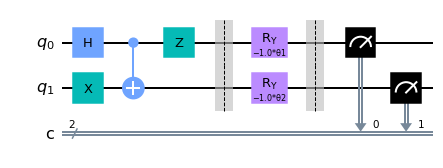

In [42]:
theta1, theta2 = Parameter('θ1'), Parameter('θ2')

qr = QuantumRegister(2,'q')
cr = ClassicalRegister(2,'c')
circ = QuantumCircuit(qr,cr)
circ.h(0)
circ.x(1)
circ.cnot(0,1)
circ.z(0)
circ.barrier(qr)
circ.ry(-theta1,0)
circ.ry(-theta2,1)
circ.barrier(qr)
circ.measure(qr,cr)
circ.draw('mpl')

To simulate the thought experiment, let us consider a long list of random axis choices. There are really only 9 possible combinations, so we could technically consider only nine cases and just use a larger number of shots per choice. But in the spirit of a true simulation, we'll make a long list of rancom choices.

For each of these $N$ choices, we randomly select a $\theta$ from the list for each observer. Just to get the best statistical gain for our buck, we'll take a large number of shots for each random configuration. 

Once we get the final counts, we simply have to look at the relative fraction of measurements for which the same result ('00' or '11') was obtained by both observers and the relative fraction for which the opposite result ('01' or '10') was obtained by the observer

In [45]:
N = 75

theta1_vals = np.zeros(N)
theta2_vals = np.zeros(N)

for i in range(0,N):
    theta1_vals[i] = θ[np.random.randint(3)]
    theta2_vals[i] = θ[np.random.randint(3)]

nshots = 1024
job = execute(circ,shots=nshots,
              backend=BasicAer.get_backend('qasm_simulator'),
              parameter_binds=[{theta1: val1, theta2: val2} for (val1, val2) in zip(theta1_vals, theta2_vals)])

counts = job.result().get_counts()

n00 = list(map(lambda c: c.get('00', 0), counts))
n11 = list(map(lambda c: c.get('11', 0), counts))
n01 = list(map(lambda c: c.get('01', 0), counts))
n10 = list(map(lambda c: c.get('10', 0), counts))

Psame = (sum(n00)+sum(n11))/(N*nshots)
Popp = (sum(n01)+sum(n10))/(N*nshots)

print('Psame = '+str(Psame) + ' while Bell predicts Psame < ' + str(4.0/9.0))
print('Popp = '+str(Popp) + ' while Bell predicts Popp > ' + str(5.0/9.0))

Psame = 0.4785286458333333 while Bell predicts Psame < 0.4444444444444444
Popp = 0.5214713541666667 while Bell predicts Popp > 0.5555555555555556


You should find that the simulator shows a violation of the Bell inequalities. The next step is to run this on an actual computer. Using $N = 900$ is a little risky because only certain machines support this number of circuits threaded into a single job (```ibm_perth```, ```ibm_lagos```, ```ibmg_jakarta``` currently do). If you end up using a five qubit machine, you'll need to drop $N$ down to 75.

In [46]:
job = execute(circ,
          backend=qcomp,shots=nshots,
          parameter_binds=[{theta1: val1, theta2: val2} for (val1, val2) in zip(theta1_vals, theta2_vals)])

from qiskit.tools.monitor import job_monitor
job_monitor(job)

counts = job.result().get_counts()

Job Status: job has successfully run


In [47]:
n00 = list(map(lambda c: c.get('00', 0), counts))
n11 = list(map(lambda c: c.get('11', 0), counts))
n01 = list(map(lambda c: c.get('01', 0), counts))
n10 = list(map(lambda c: c.get('10', 0), counts))

Psame = (sum(n00)+sum(n11))/(N*nshots)
Popp = (sum(n01)+sum(n10))/(N*nshots)

print('Psame = '+str(Psame) + ' while Bell predicts Psame < ' + str(4.0/9.0))
print('Popp = '+str(Popp) + ' while Bell predicts Popp > ' + str(5.0/9.0))

Psame = 0.48201822916666665 while Bell predicts Psame < 0.4444444444444444
Popp = 0.5179817708333333 while Bell predicts Popp > 0.5555555555555556


<b>Exercise: </b> Do the quantum computer results violate Bell's theorem?

<b>Exercise: </b> Make a plot of the quantum mechanical predictions $P_{same}(\theta)$ and $P_{opp}(\theta)$. Find some choice of $\theta$ for which Bell's inequalities are <i>not</i> violated. Make a copy of the circuit used above with this choice of $\theta$, and assess whether the quantum mechanical predictions are valid.

### (ii) Correlations and entanglement

Let's introduce the Hadamard gate: $H\left|+\right\rangle = \left|+\right\rangle_{x}$, $H\left|-\right\rangle = \left|-\right\rangle_{x}$. 

Matrix representation:

$\displaystyle \hat{H} \dot{=} \frac{1}{\sqrt{2}}\left(\begin{array}{cc} 1 & 1 \\ 1 & -1\end{array}\right)$

Note, however, that this is just a $\hat{U}$ gate with $\theta = \frac{\pi}{2}$, $\phi = 0$, $\lambda = \pi$ where

$\displaystyle \hat{U}(\theta,\phi,\lambda) = \left(\begin{array}{cc} \cos\frac{\theta}{2} & -e^{i\lambda}\sin\frac{\theta}{2}\\ e^{i\phi}\sin\frac{\theta}{2} & e^{i(\phi + \lambda)}\cos\frac{\theta}{2}\end{array}\right)$.

Because this particular gate (which takes the states $\left|\pm\right\rangle$ to $\left|\pm\right\rangle_{x}$, respectively) is so commonly used, it's often invoked as ```h(qr)``` directly instead of using ```u(0.5*np.pi,0,np.pi)```.

One can quickly verify that this gate does take $\left|+\right\rangle$ to $\left|+\right\rangle_{x}$ by applying it to newly initialized qubits and measuring $\hat{S}^{z}$.

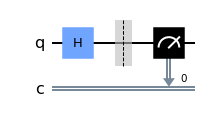

In [48]:
qr = QuantumRegister(1,'q')
cr = ClassicalRegister(1,'c')

hcirc = QuantumCircuit(qr,cr)
hcirc.h(0)
hcirc.barrier(range(1))
hcirc.measure(qr, cr)
hcirc.draw('mpl')

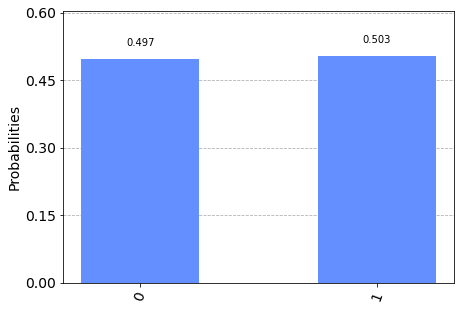

In [49]:
Nshot = 8192
job = execute(hcirc,
              backend=BasicAer.get_backend('qasm_simulator'),shots=Nshot)

counts = job.result().get_counts()

plot_histogram(counts)

As expected, we find half the states to be $\left|+\right\rangle$ and the other half to be $\left|-\right\rangle$, entirely consistent with the Hadamard gate creating $\left|+\right\rangle_{x}$ from the initialized $\left|+\right\rangle$ states.

Now let's talk <i>entanglement</i>, and try to create the following state:

$\left|\psi\right\rangle = \frac{1}{\sqrt{2}}\left(\left|+\right\rangle\left|-\right\rangle - \left|-
\right\rangle\left|+\right\rangle \right),$

also sometimes written $\frac{1}{\sqrt{2}}\left(\left|+-\right\rangle - \left|-+\right\rangle \right).$

Starting from $\left|++\right\rangle$, we can apply $\hat{H}$ to the first spin, obtaining $\frac{1}{\sqrt{2}}\left(\left|++\right\rangle + \left|-+\right\rangle\right)$. 

Next, the second spin needs to be flipped to $\left|-\right\rangle$ <i>only</i> in the first term. One way of phrasing this task is: "if the first spin state is $\left|+\right\rangle$, change the state of the second spin from $\left|+\right\rangle$ to $\left|-\right\rangle$. This is our first example of a multispin (or multiqubit) gate. It turns out that the $CNOT$ (controlled "not") gate accomplishes almost this:

$CNOT\left|++\right\rangle = \left|++\right\rangle$

$CNOT\left|+-\right\rangle = \left|+-\right\rangle$

$CNOT\left|-+\right\rangle = \left|--\right\rangle$

$CNOT\left|--\right\rangle = \left|-+\right\rangle$

Here we use the first spin as the "control" spin. If the first state is $\left|-\right\rangle$, then the second state is swapped. Otherwise, the two-spin state is unchanged. This gate by itself won't turn our state into the singlet. <i>But</i> if we flip the second spin first

$\frac{1}{\sqrt{2}}\left(\left|++\right\rangle + \left|-+\right\rangle\right) \rightarrow \frac{1}{\sqrt{2}}\left(\left|+-\right\rangle + \left|--\right\rangle\right),$

an application of $CNOT$ takes us almost to the singlet. The final step needs to change the sign of the $\left|-+\right\rangle$ term. This can be accomplished by the following unitary operation $\hat{U}(0, \pi, 0)$ acting on the first spin. This gate is equivalent to $\sigma^{z}$ and sometimes given the label $\hat{Z}$. Thus we need the following circuit:

In [50]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
singlet = QuantumCircuit(qr,cr)
singlet.h(0)
singlet.x(1)
singlet.cnot(0,1)
singlet.z(0)
singlet.barrier(range(2))
singlet.measure(qr, cr)
singlet.draw()

┌───┐     ┌───┐ ░ ┌─┐   
q246_0: ┤ H ├──■──┤ Z ├─░─┤M├───
        ├───┤┌─┴─┐└───┘ ░ └╥┘┌─┐
q246_1: ┤ X ├┤ X ├──────░──╫─┤M├
        └───┘└───┘      ░  ║ └╥┘
  c3: 2/═══════════════════╩══╩═
                           0  1

Measurement as employed above won't confirm the relative phase (and can't distinguish $\frac{1}{\sqrt{2}}\left(\left|+-\right\rangle - \left|-+\right\rangle\right)$ from $\frac{1}{\sqrt{2}}\left(\left|+-\right\rangle + \left|-+\right\rangle\right)$), but it does confirm that our state is an equal combination of $\left|+-\right\rangle$ and $\left|-+\right\rangle$.

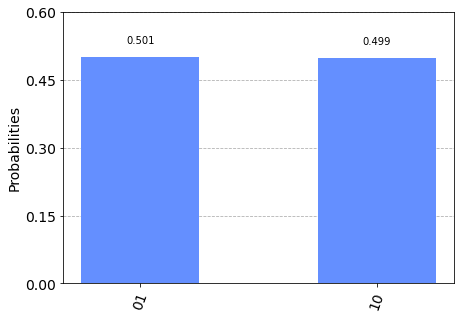

In [51]:
Nshot = 8192
job = execute(singlet,
              backend=BasicAer.get_backend('qasm_simulator'),shots=Nshot)

counts = job.result().get_counts()

plot_histogram(counts)

Recall that in interpreting these states, we need to remember the correspondence '0' $\rightarrow\left|+\right\rangle$, '1'$\rightarrow \left|-\right\rangle$. To address the phase, you can actually build this circuit in the IBM Circuit Composer and see the phase displayed. Alternatively, we can perform a series of measurements which distinguish these two states. 

The trick is to measure $\hat{S}^{2} \equiv \left[\hat{S}^{x}\right]^{2} + \left[\hat{S}^{y}\right]^{2} + \left[\hat{S}^{z}\right]^{2}$ for both states. For a multiparticle state, we have (e.g.)

$$\hat{S}^{x} = \hat{S}_{1}^{x} + \hat{S}^{x}_{2},$$

where $\hat{S}^{x}_{i}$ refers to the $x$ projection of spin for the $i^{th}$ spin. To calculate this expectation value analytically, one needs to remember that <i>all</i> operators acting on a two-spin state are actually tensor products of individual operators acting on both spins, though one might be trivial. Specifically, the spin component operators are

$$\hat{S}^{x}_{1} \equiv \hat{S}^{x}\otimes\hat{I},$$
$$\hat{S}^{x}_{1} \equiv \hat{I}\otimes\hat{S}^{x},$$

where $\hat{I}$ is the identity operator and $\hat{S}^{x}$ is the usual operator corresponding to the $x$ projection of a single spin, represented by a $2\times 2$ matrix. Fortunately, this distinction is not important for our experimental approach. 

Let's take a step back: in order to calculate $\hat{S}^{2}$, we'll need to measure <i>six</i> quantities: the three components of spin for each of the two spins. We also have to do this for both types of two-particle states, so that's really 12 separate circuits. As a matter of efficiency, it is technically possible to reset the state after a spin is measured. But this adds to the depth of the circuit and makes deciphering the results a little more complicated since we have to write everything to a single classical register. We can adopt one of several approaches: (1) make twelve two-qubit circuits and send out twelve jobs, (2) bundle (say) three uncoupled, two-qubit circuits together and send out four six-qubit circuits, or (3) get clever with <i>parameter</i> threading and try to bundle. Some benefits and drawbacks to each approach:

1. This is conceptually simplest, but it does involve writing twelve separate circuits and sending out a large number of individual jobs. Results are naturally organized, but there's more upfront work. Also, one might run into significant wait times if sending a large number of jobs out one at a time.
2. This is a nice middle-ground because it reduces the number of circuits by a factor of three. However, it involves using a larger classical register that must be deciphered. Instead of seeing (for example) '1' as a measurement, one will see something like '011' which must be split into '0', '1', and '1' for analysis.
3. The last approach has the benefit of bundling as much as possible as a single job <i>and</i> neatly organizing the individual measurements. The biggest drawback is the added complexity of figuring out an efficient way of threading the parameters <i>and</i> desigining a flexible-but-efficient circuit that can perform multiple tasks according to a set of parameters.

Here's a fairly reasonable middle ground: A spin measurement is fairly easy to be cast in terms of parameters. We have already seen how to perform a spin measurement in some arbitrary direction $\hat{n}(\theta,\phi)$. $\hat{S}^{x}$ corresponds to $\theta = \frac{\pi}{2}$, $\phi = 0$, $\hat{S}^{y}$ corresponds to $\theta = \frac{\pi}{2}$, $\phi = \frac{\pi}{2}$, and $\hat{S}^{z}$ corresponds to $\theta = 0$, $\phi = 0$ (or anything). Since the states are entangled, measuring one spin determines which value will be obtained from the measurement of the second spin (along that same direction). So we have to do these spin measurements independently (doubling the number of circuits, or at least the depth!). We'll make two copies of each state on a four-qubit circuit with the top two qubits for measuring the first spin and the bottom two for measuring the second spin. Each "subcircuit" is an identical set of gates with only the measurement differing. This <i>will</i> complicate the output, but it's not too bad with only two measurements. We need something like:

In [52]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

from qiskit.circuit import Parameter
theta = Parameter('θ')
phi = Parameter('ϕ')

In [53]:
singletcirc = QuantumCircuit(qr,cr)
#singlet state
singletcirc.h(0)
singletcirc.x(1)
singletcirc.cnot(0,1)
singletcirc.z(0)
singletcirc.barrier(qr)
singletcirc.rz(-phi,qr)
singletcirc.ry(-theta,qr)
singletcirc.measure(qr, cr)
singletcirc.draw()

┌───┐     ┌───┐ ░ ┌────────────┐┌────────────┐┌─┐   
q267_0: ┤ H ├──■──┤ Z ├─░─┤ Rz(-1.0*ϕ) ├┤ Ry(-1.0*θ) ├┤M├───
        ├───┤┌─┴─┐└───┘ ░ ├────────────┤├────────────┤└╥┘┌─┐
q267_1: ┤ X ├┤ X ├──────░─┤ Rz(-1.0*ϕ) ├┤ Ry(-1.0*θ) ├─╫─┤M├
        └───┘└───┘      ░ └────────────┘└────────────┘ ║ └╥┘
  c4: 2/═══════════════════════════════════════════════╩══╩═
                                                       0  1

Our results will be a package of three (one for each choice of $(\theta,\phi)$) dictionaries containing counts for the states '11', '00', '10', '01'. So a bit of post-processing is necesssary to make sense of this. Let's have a look at how this behaves on the QASM simulator. 

In [54]:
theta_range = [np.pi/2, np.pi/2, 0.0]
phi_range = [0.0, np.pi/2, 0.0]

Nshots = 8192
job = execute(singletcirc,shots=Nshots,
              backend=BasicAer.get_backend('qasm_simulator'),
              parameter_binds=[{theta: val1, phi: val2} for (val1, val2) in zip(theta_range, phi_range)])

counts_singlet = job.result().get_counts()

In [55]:
counts_singlet

[{'01': 4041, '10': 4151}, {'10': 4027, '01': 4165}, {'01': 4065, '10': 4127}]

The other state can be attacked similarly (and then we'll get to analyzing those counts)

In [56]:
tripletcirc = QuantumCircuit(qr,cr)
#triplet state
tripletcirc.h(0)
tripletcirc.x(1)
tripletcirc.cnot(0,1)
tripletcirc.barrier(qr)
tripletcirc.rz(-phi,qr)
tripletcirc.ry(-theta,qr)
tripletcirc.measure(qr, cr)
tripletcirc.draw()

┌───┐      ░ ┌────────────┐┌────────────┐┌─┐   
q267_0: ┤ H ├──■───░─┤ Rz(-1.0*ϕ) ├┤ Ry(-1.0*θ) ├┤M├───
        ├───┤┌─┴─┐ ░ ├────────────┤├────────────┤└╥┘┌─┐
q267_1: ┤ X ├┤ X ├─░─┤ Rz(-1.0*ϕ) ├┤ Ry(-1.0*θ) ├─╫─┤M├
        └───┘└───┘ ░ └────────────┘└────────────┘ ║ └╥┘
  c4: 2/══════════════════════════════════════════╩══╩═
                                                  0  1

In [57]:
Nshots = 8192
job = execute(tripletcirc,shots=Nshots,
              backend=BasicAer.get_backend('qasm_simulator'),
              parameter_binds=[{theta: val1, phi: val2} for (val1, val2) in zip(theta_range, phi_range)])

counts_triplet = job.result().get_counts()

In [58]:
counts_triplet

[{'00': 4046, '11': 4146}, {'00': 4051, '11': 4141}, {'01': 4019, '10': 4173}]

<!--Clearly there <i>is</i> some difference. For the singlet, all spin components return perfectly (up to statistical fluctuations) anticorrelated results. One should never work harder than necessary, so let's try to find the easiest way to interpret these results.-->

We are attempting to measure the squared spin operator, 

$$\hat{S}^{2} = \left[\hat{S}_{1}^{x} + \hat{S}_{2}^{x}\right]^{2} + \left[\hat{S}_{1}^{y} + \hat{S}_{2}^{y}\right]^{2} + \left[\hat{S}_{1}^{z} + \hat{S}_{2}^{z}\right]^{2}$$

Here $\hat{S}_{1,2}^{x,y,z}$ are just spin-$\frac{1}{2}$ operators attached to an identity operator for the other spin. Thus, they satisfy the same algebra as the spin-$\frac{1}{2}$ operators. Simplifying, we have

$$\hat{S}^{2} = \hat{S}_{1}^{2} + \hat{S}_{2}^{2} + 2\hat{\bf S}_{1}\cdot \hat{\bf S}_{2}$$

Here, $\hat{S}_{1}^{2} \equiv \left[\hat{S}_{1}^{x}\right]^{2} + \left[\hat{S}_{1}^{y}\right]^{2} + \left[\hat{S}_{1}^{z}\right]^{2}$ and similarly for $\hat{S}_{2}^{2}$. The last term is shorthand for

$$\hat{\bf S}_{1}\cdot \hat{\bf S}_{2} = \hat{S}^{x}\otimes \hat{S}^{x} + \hat{S}^{y}\otimes \hat{S}^{y} + \hat{S}^{z}\otimes \hat{S}^{z}.$$

It's simple enough to use the $2\times 2$ Pauli representation of the single spin-$\frac{1}{2}$ operators to show

$$\hat{S}_{1}^{2} = \hat{S}_{2}^{2} = \frac{3\hbar^{2}}{4}\hat{I}.$$

Thus, for some state $\left|\psi\right\rangle$, we expect an average of a large number of measurements of $\hat{S}^{2}$ to yield

$$\left\langle \hat{S}^{2}\right\rangle = \frac{3\hbar^{2}}{2} + 2\left\langle \hat{\bf S}_{1} \cdot \hat{\bf S}_{2}\right\rangle.$$

That is, effectively we only need to measure $\left\langle \hat{\bf S}_{1} \cdot \hat{\bf S}_{2}\right\rangle$ to measure $\hat{S}^{2}$. Conveniently, the three sets of outputs correspond to the three terms in

$$\hat{\bf S}_{1}\cdot \hat{\bf S}_{2} = \hat{S}^{x}\otimes \hat{S}^{x} + \hat{S}^{y}\otimes \hat{S}^{y} + \hat{S}^{z}\otimes \hat{S}^{z}.$$

We just need to make the identifications (using $x$ as an example)

- '00': $\;\;\;\;\;\;\;\;\;\;\hat{S}_{1}^{x}\cdot\hat{S}_{2}^{x} \rightarrow \left(+\frac{\hbar}{2}\right)\left(+\frac{\hbar}{2}\right) = + \left(\frac{\hbar}{2}\right)^{2}$
- '01': $\;\;\;\;\;\;\;\;\;\;\hat{S}_{1}^{x}\cdot\hat{S}_{2}^{x} \rightarrow \left(+\frac{\hbar}{2}\right)\left(-\frac{\hbar}{2}\right) = - \left(\frac{\hbar}{2}\right)^{2}$
- '10': $\;\;\;\;\;\;\;\;\;\;\hat{S}_{1}^{x}\cdot\hat{S}_{2}^{x} \rightarrow \left(-\frac{\hbar}{2}\right)\left(+\frac{\hbar}{2}\right) = - \left(\frac{\hbar}{2}\right)^{2}$
- '11': $\;\;\;\;\;\;\;\;\;\;\hat{S}_{1}^{x}\cdot\hat{S}_{2}^{x} \rightarrow \left(-\frac{\hbar}{2}\right)\left(-\frac{\hbar}{2}\right) = + \left(\frac{\hbar}{2}\right)^{2}$

So let's grab the counts and compute the spin correlations according to this dictionary:

In [59]:
n00 = list(map(lambda c: c.get('00', 0), counts_triplet))
n01 = list(map(lambda c: c.get('01', 0), counts_triplet))
n10 = list(map(lambda c: c.get('10', 0), counts_triplet))
n11 = list(map(lambda c: c.get('11', 0), counts_triplet))

Next we effectively perform an average of the measurement outcomes ($\pm\frac{\hbar^{2}}{4}$ depending on the relative aligmnent of the two spins, weighted by the number of counts for each possibility:

In [60]:
Sx12 = 0.25*(n00[0]+n11[0]-n01[0]-n10[0])/(n00[0]+n11[0]+n01[0]+n10[0])
Sy12 = 0.25*(n00[1]+n11[1]-n01[1]-n10[1])/(n00[1]+n11[1]+n01[1]+n10[1])
Sz12 = 0.25*(n00[2]+n11[2]-n01[2]-n10[2])/(n00[2]+n11[2]+n01[2]+n10[2])

Lastly, we compute (for the triplet state):

$$\left\langle \hat{S}^{2}\right\rangle  = \frac{3\hbar^{2}}{2} + \left\langle\hat{\bf S}_{1}\cdot {\bf S}_{2}\right\rangle$$

In [61]:
print(0.75+0.75+2*(Sz12+Sx12+Sy12))

2.0


Repeating for the singlet state:

In [62]:
n00 = list(map(lambda c: c.get('00', 0), counts_singlet))
n01 = list(map(lambda c: c.get('01', 0), counts_singlet))
n10 = list(map(lambda c: c.get('10', 0), counts_singlet))
n11 = list(map(lambda c: c.get('11', 0), counts_singlet))


Sx12 = 0.25*(n00[0]+n11[0]-n01[0]-n10[0])/(n00[0]+n11[0]+n01[0]+n10[0])
Sy12 = 0.25*(n00[1]+n11[1]-n01[1]-n10[1])/(n00[1]+n11[1]+n01[1]+n10[1])
Sz12 = 0.25*(n00[2]+n11[2]-n01[2]-n10[2])/(n00[2]+n11[2]+n01[2]+n10[2])

print(0.75+0.75+2*(Sz12+Sx12+Sy12))

0.0


Inserting the "missing" factors of $\hbar$, we conclude

$$\left\langle \hat{S}^{2}\right\rangle = \left\{\begin{array}{cc} 1\cdot(1+1)\hbar^{2} & (\mbox{triplet})\\ 0 & (\mbox{singlet})\end{array}\right.$$

Single qubits map to spin-$\frac{1}{2}$ degrees of freedom. When we consider the state describing multiple qubits, we find that such a state can map to a general spin-$s$ state for which$^{\dagger}$ $\hat{S}^{2} \rightarrow s(s+1)\hbar^{2}\hat{I}$ with $s = 0,\frac{1}{2},1,\frac{3}{2},\cdots$. Comparing this to our observations, we find that the triplet state is actually a spin-$1$ state, while the singlet is spin-0 (no internal spin degree of freedom). 

$\dagger$ - The squared-spin operator only takes on this simple form in the basis of total spin $s$ eigenstates.

Now let us try running this on real hardware. 

In [63]:
Nshots = 8192

job = execute(singletcirc,
        backend=qcomp,shots=8192,
        parameter_binds=[{theta: val1, phi: val2} for (val1, val2) in zip(theta_range, phi_range)])


job_monitor(job)
counts_sing = job.result().get_counts()

Job Status: job has successfully run


In [64]:
Nshots = 8192

job = execute(tripletcirc,
        backend=qcomp,shots=8192,
        parameter_binds=[{theta: val1, phi: val2} for (val1, val2) in zip(theta_range, phi_range)])

job_monitor(job)
counts_trip = job.result().get_counts()

Job Status: job has successfully run


In [65]:
n00 = list(map(lambda c: c.get('00', 0), counts_sing))
n01 = list(map(lambda c: c.get('01', 0), counts_sing))
n10 = list(map(lambda c: c.get('10', 0), counts_sing))
n11 = list(map(lambda c: c.get('11', 0), counts_sing))


Sx12s = 0.25*(n00[0]+n11[0]-n01[0]-n10[0])/(n00[0]+n11[0]+n01[0]+n10[0])
Sy12s = 0.25*(n00[1]+n11[1]-n01[1]-n10[1])/(n00[1]+n11[1]+n01[1]+n10[1])
Sz12s = 0.25*(n00[2]+n11[2]-n01[2]-n10[2])/(n00[2]+n11[2]+n01[2]+n10[2])

Ssq = 0.75+0.75+2*(Sz12s+Sx12s+Sy12s)
print('<S^2> = ' + str(Ssq) + ' (singlet)')

<S^2> = 0.2242431640625 (singlet)


In [66]:
n00 = list(map(lambda c: c.get('00', 0), counts_trip))
n01 = list(map(lambda c: c.get('01', 0), counts_trip))
n10 = list(map(lambda c: c.get('10', 0), counts_trip))
n11 = list(map(lambda c: c.get('11', 0), counts_trip))


Sx12t = 0.25*(n00[0]+n11[0]-n01[0]-n10[0])/(n00[0]+n11[0]+n01[0]+n10[0])
Sy12t = 0.25*(n00[1]+n11[1]-n01[1]-n10[1])/(n00[1]+n11[1]+n01[1]+n10[1])
Sz12t = 0.25*(n00[2]+n11[2]-n01[2]-n10[2])/(n00[2]+n11[2]+n01[2]+n10[2])

Ssq = 0.75+0.75+2*(Sz12t+Sx12t+Sy12t)
print('<S^2> = ' + str(Ssq) + ' (triplet)')

<S^2> = 1.9368896484375 (triplet)


The results are a bit noisier, but roughly agree with the simulation prediction. 

This quantity $\left\langle \hat{\bf S}_{1}\cdot\hat{\bf S}_{2}\right\rangle$ is actually an example of something refered to as a <i>correlation function</i>. If we take a closer look at the invidual pieces, we can gain some insight into the quantum state:

In [67]:
print('<Sx1 Sx2> = '+str(Sx12s))
print('<Sy1 Sy2> = '+str(Sy12s))
print('<Sz1 Sz2> = '+str(Sz12s))

<Sx1 Sx2> = -0.21636962890625
<Sy1 Sy2> = -0.2091064453125
<Sz1 Sz2> = -0.21240234375


In [68]:
print('<Sx1 Sx2> = '+str(Sx12t))
print('<Sy1 Sy2> = '+str(Sy12t))
print('<Sz1 Sz2> = '+str(Sz12t))

<Sx1 Sx2> = 0.2147216796875
<Sy1 Sy2> = 0.215576171875
<Sz1 Sz2> = -0.21185302734375


Both states show anticorrelation in the individual measurements of $\hat{S}^{z}$. This makes sense, because both states are composed of $\left|+-\right\rangle$ and $\left|-+\right\rangle$, so there's no possible way to have both spins in the same eigenstate of $\hat{S}^{z}$. That relative phase ($e^{i0} = 1$ vs. $e^{i\pi} = -1$ makes a significant difference in the correlations between the spins with respect to $\hat{S}^{x}$ and $\hat{S}^{y}$. 

For the "triplet" state, the positive correlations $\left\langle \hat{S}^{x}_{1}\hat{S}_{2}^{x}\right\rangle$ and $\left\langle \hat{S}^{y}_{1}\hat{S}_{2}^{y}\right\rangle$ indicate that the $x$ and $y$ projections of the individual spins have a tendency to align. Classically, one thinks of spin as a little arrow of magnitude $\frac{\hbar}{2}$ which points along some axis in three-dimensional space. Combining two spins results in a new type of quantum state whose interpretation is not so simple. It is possible to identify this state as an effective spin-1 state with $\left\langle \hat{S}^{z} \right\rangle = 0$. In the classical picture, this corresponds to a little vector of magnitude $\hbar$ which has no projection along $z$ and lives in the $xy$ plane. Of course, this state <i>isn't</i> a classical vector in real space. But this sloppy picture is roughly reflected in the structure of the correlations. 

The singlet state is a bit more interesting. All correlations are negative. The individual spins appear <i>entirely</i> anticorrelated, regardless of the direction. Consequently, it should not be too surprising to learn that this two-particle state can be viewed effectively as a spinless ($s = 0$) state. To really drive home these correlations, let's look more closely at how they change for both states as the spin axis is varied. For simplicity, let's just keep $\phi = 0$ and vary $\theta$ from 0 to $\pi$. To proceed, we thread a sample of $\theta$ values into the circuit to bundle everything together.

In [69]:
singletcircθ = QuantumCircuit(qr,cr)
#singlet state
singletcircθ.h(0)
singletcircθ.x(1)
singletcircθ.cnot(0,1)
singletcircθ.z(0)
singletcircθ.barrier(qr)
singletcircθ.ry(-theta,qr)
singletcircθ.measure(qr, cr)
singletcircθ.draw()

┌───┐     ┌───┐ ░ ┌────────────┐┌─┐   
q267_0: ┤ H ├──■──┤ Z ├─░─┤ Ry(-1.0*θ) ├┤M├───
        ├───┤┌─┴─┐└───┘ ░ ├────────────┤└╥┘┌─┐
q267_1: ┤ X ├┤ X ├──────░─┤ Ry(-1.0*θ) ├─╫─┤M├
        └───┘└───┘      ░ └────────────┘ ║ └╥┘
  c4: 2/═════════════════════════════════╩══╩═
                                         0  1

In [70]:
tripletcircθ = QuantumCircuit(qr,cr)
#triplet state
tripletcircθ.h(0)
tripletcircθ.x(1)
tripletcircθ.cnot(0,1)
tripletcircθ.barrier(qr)
tripletcircθ.ry(-theta,qr)
tripletcircθ.measure(qr, cr)
tripletcircθ.draw()

┌───┐      ░ ┌────────────┐┌─┐   
q267_0: ┤ H ├──■───░─┤ Ry(-1.0*θ) ├┤M├───
        ├───┤┌─┴─┐ ░ ├────────────┤└╥┘┌─┐
q267_1: ┤ X ├┤ X ├─░─┤ Ry(-1.0*θ) ├─╫─┤M├
        └───┘└───┘ ░ └────────────┘ ║ └╥┘
  c4: 2/════════════════════════════╩══╩═
                                    0  1

In [71]:
Ntheta = 75
theta_range = np.linspace(0,np.pi,Ntheta)

We'll run both of these on the simulator and on a quantum device.

In [72]:
Nshots = 8192
job = execute(tripletcircθ,shots=Nshots,
              backend=BasicAer.get_backend('qasm_simulator'),
              parameter_binds=[{theta: val1} for val1 in theta_range])

counts_tripθsim = job.result().get_counts()

In [73]:
job = execute(singletcircθ,shots=Nshots,
              backend=BasicAer.get_backend('qasm_simulator'),
              parameter_binds=[{theta: val1} for val1 in theta_range])

counts_singθsim = job.result().get_counts()

In [74]:
job = execute(singletcircθ,
        backend=qcomp,shots=8192,
        parameter_binds=[{theta: val1} for val1 in theta_range])

job_monitor(job)

counts_singθ = job.result().get_counts()

/Users/jllancas/opt/anaconda3/envs/qspace/lib/python3.9/site-packages/qiskit/execute_function.py:399: UserWarning: Nshots is not a recognized runtime option and may be ignored by the backend.
  job = backend.run(experiments, **run_kwargs)


Job Status: job has successfully run


In [76]:
job = execute(tripletcircθ,
        backend=qcomp,shots=8192,
        parameter_binds=[{theta: val1} for val1 in theta_range])

job_monitor(job)

counts_tripθ = job.result().get_counts()

Job Status: job has successfully run


The analysis is roughly the same, but with <i>many</i> values of $\theta$, we're better off letting a loop organize everything:

In [77]:
S1S2tripsim = np.zeros(Ntheta)
S1S2singsim = np.zeros(Ntheta)
S1S2trip = np.zeros(Ntheta)
S1S2sing = np.zeros(Ntheta)

n00 = list(map(lambda c: c.get('00', 0), counts_tripθsim))
n01 = list(map(lambda c: c.get('01', 0), counts_tripθsim))
n10 = list(map(lambda c: c.get('10', 0), counts_tripθsim))
n11 = list(map(lambda c: c.get('11', 0), counts_tripθsim))

for i in range(0,Ntheta):
    S1S2tripsim[i] = 0.25*(n00[i]+n11[i]-n01[i]-n10[i])/(n00[i]+n11[i]+n01[i]+n10[i])
    
n00 = list(map(lambda c: c.get('00', 0), counts_singθsim))
n01 = list(map(lambda c: c.get('01', 0), counts_singθsim))
n10 = list(map(lambda c: c.get('10', 0), counts_singθsim))
n11 = list(map(lambda c: c.get('11', 0), counts_singθsim))

for i in range(0,Ntheta):
    S1S2singsim[i] = 0.25*(n00[i]+n11[i]-n01[i]-n10[i])/(n00[i]+n11[i]+n01[i]+n10[i])
    
n00 = list(map(lambda c: c.get('00', 0), counts_tripθ))
n01 = list(map(lambda c: c.get('01', 0), counts_tripθ))
n10 = list(map(lambda c: c.get('10', 0), counts_tripθ))
n11 = list(map(lambda c: c.get('11', 0), counts_tripθ))

for i in range(0,Ntheta):
    S1S2trip[i] = 0.25*(n00[i]+n11[i]-n01[i]-n10[i])/(n00[i]+n11[i]+n01[i]+n10[i])
    
n00 = list(map(lambda c: c.get('00', 0), counts_singθ))
n01 = list(map(lambda c: c.get('01', 0), counts_singθ))
n10 = list(map(lambda c: c.get('10', 0), counts_singθ))
n11 = list(map(lambda c: c.get('11', 0), counts_singθ))

for i in range(0,Ntheta):
    S1S2sing[i] = 0.25*(n00[i]+n11[i]-n01[i]-n10[i])/(n00[i]+n11[i]+n01[i]+n10[i])


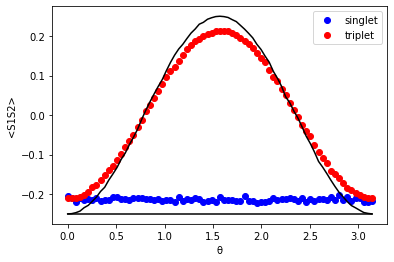

In [78]:
plt.plot(theta_range,S1S2sing,'bo',label='singlet')
plt.plot(theta_range,S1S2trip,'ro',label='triplet')
plt.plot(theta_range,S1S2singsim,'k-')
plt.plot(theta_range,S1S2tripsim,'k-')
plt.xlabel('θ')
plt.ylabel('<S1S2>')
plt.legend()
plt.show()

Agreement between simulation and actual results is fairly decent, but note that the actual correlations are never quite as large (either positive or negative) as the simulated correlations. This is a general feature of noisy systems, and these effects become more pronounced as (a) circuit depth is increased or (b) more two-qubit gates are used. The error rates for two qubit gates are roughly an order of magnitude larger than those of single qubit gates.

<b>Exercise: </b> Create the singlet and triplet states as before, but perform a rotation to change them into

$$\left|\psi'\right\rangle_{sing} \rightarrow \frac{1}{\sqrt{2}}\left(\left|+\right\rangle_{x}\left|-\right\rangle_{x} - \left|-\right\rangle_{x}\left|+\right\rangle_{x}\right),$$ 

$$\left|\psi'\right\rangle_{trip} \rightarrow \frac{1}{\sqrt{2}}\left(\left|+\right\rangle_{x}\left|-\right\rangle_{x} + \left|-\right\rangle_{x}\left|+\right\rangle_{x}\right),$$ 

If you repeat the calculation of the three correlation functions, $\left\langle \hat{S}^{\alpha}\otimes\hat{S}^{\alpha}\right\rangle$ for $\alpha = x,y,z$, which change and which stay the same? Discuss any possible reasons for the results you find.

<b>Exercise 4: </b> Consider a state which interpolates between the singlet and triplet state,

$$\left|\psi(\phi)\right\rangle = \frac{1}{\sqrt{2}}\left(\left|+\right\rangle\left|-\right\rangle +e^{i\phi}\left|-\right\rangle\left|+\right\rangle\right),$$

for $0 \leq \phi\leq \pi$. Calculate and plot the three correlation functions, $\left\langle \hat{S}^{\alpha}\otimes\hat{S}^{\alpha}\right\rangle$ for $\alpha = x,y,z$ as functions of the angle $\phi$.